In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mammo_utils import plot_metrics
%matplotlib inline

## model_s1.0.0.29l.8.2

- Binary classification
- Trained from scratch on dataset 8 for 30 epochs
- Better performance than expected

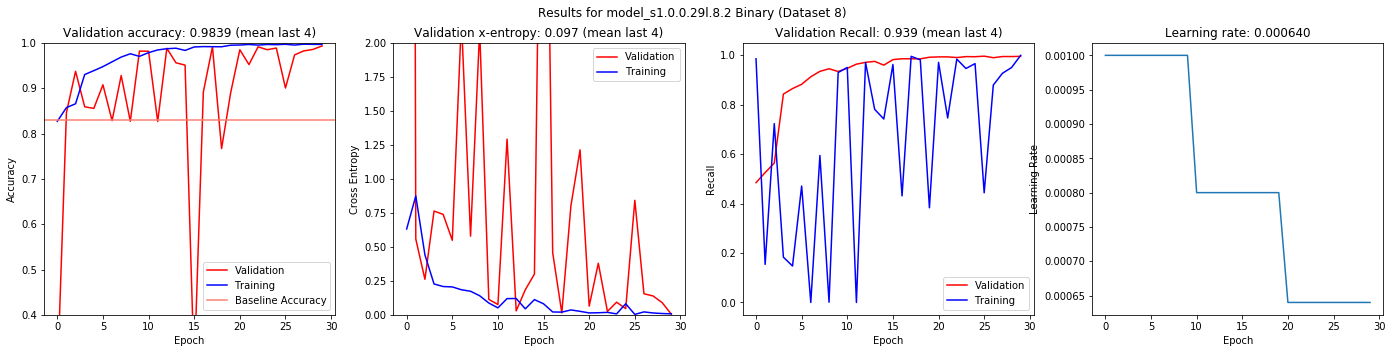

In [4]:
plot_metrics("model_s1.0.0.29l.8.2", classification="Binary", dataset=8)

## model_s1.0.0.29l.14

- Multi-class classification
- Trained on Dataset 6 from scratch for 30 epochs

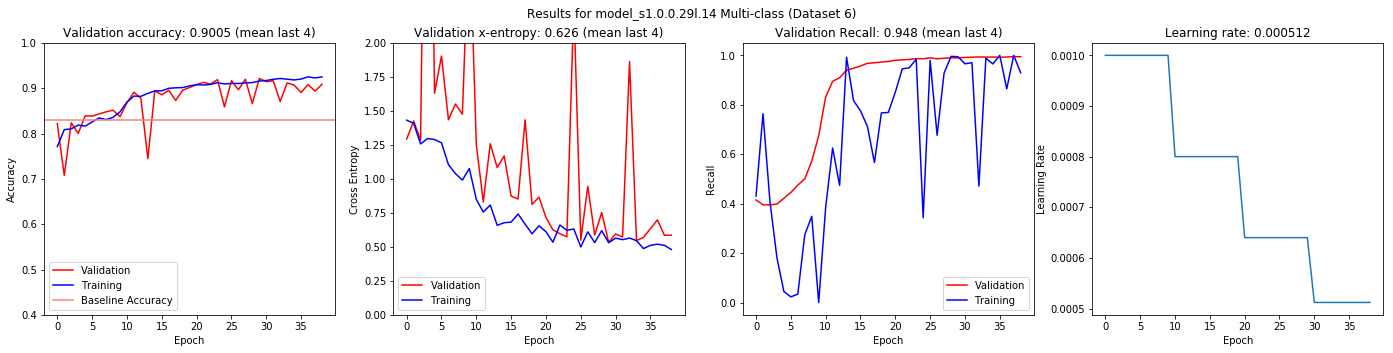

In [3]:
plot_metrics("model_s1.0.0.29l.14", classification="Multi-class", dataset=6)

## model_s1.0.0.45b.9.1

 - Binary classification
 - Trained on dataset 9 from scratch for 30 epochs
 - Validation accuracy began to drop after 15 epochs of training

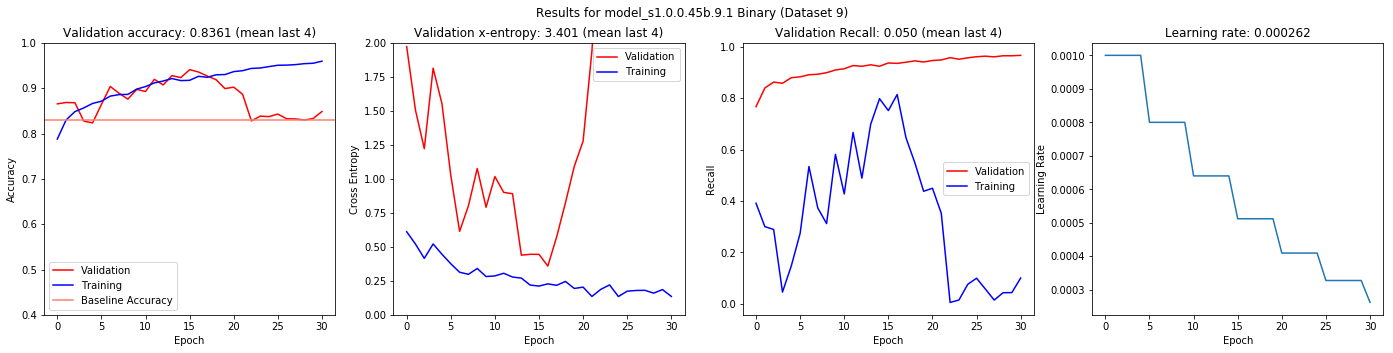

In [5]:
plot_metrics("model_s1.0.0.45b.9.1", classification="Binary", dataset=9)

## vgg_16.3.04b.9

 - Binary classification
 - Customized version of VGG-16 trained on dataset 9 for 30 epochs
 - Validation accuracy was good until epoch 15
 - Validation recall started to drop around epoch 10

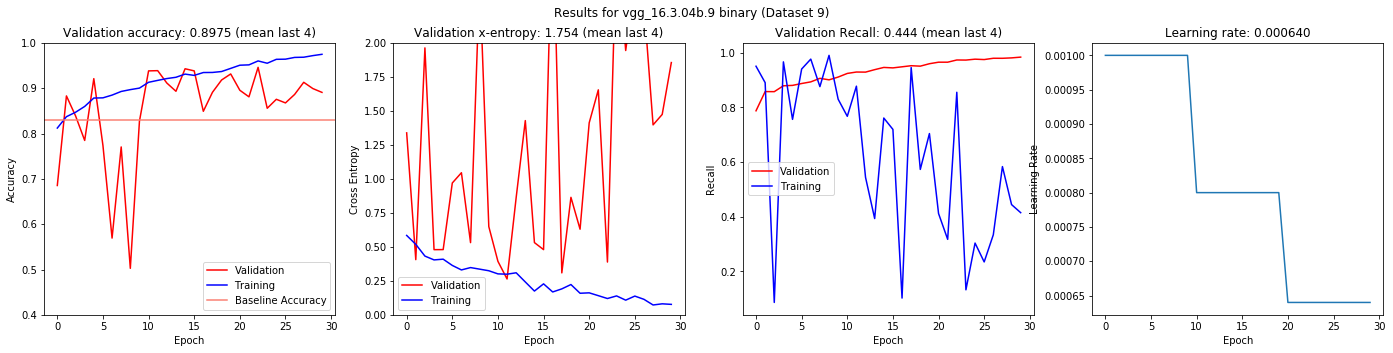

In [7]:
plot_metrics("vgg_16.3.04b.9", classification="binary", dataset=9)

## vgg_16.2.02b

 - Binary classification
 - Customized version of VGG-16 trained on dataset 9 for 27 epochs
 - Good performance on training data but did not generalize well to validation data

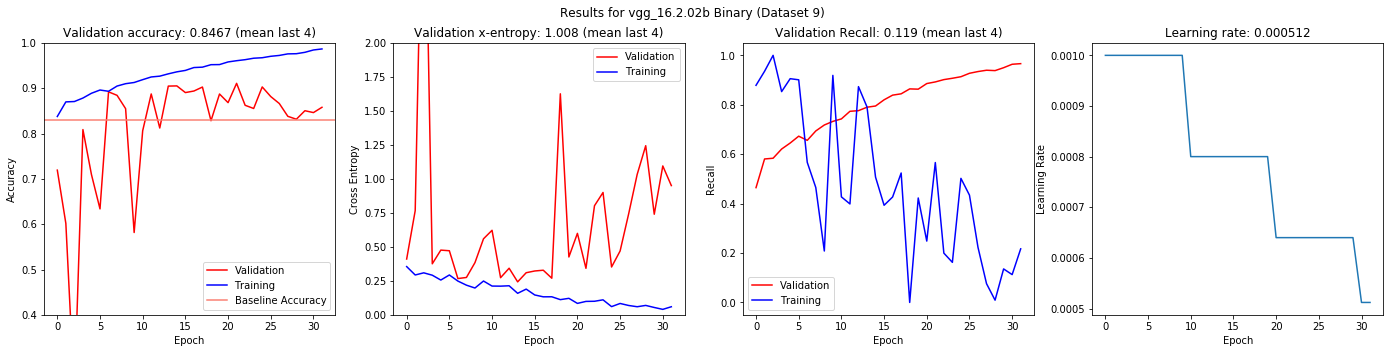

In [6]:
plot_metrics("vgg_16.2.02b", classification="binary", dataset=9)

## model_s0.0.2.02b

 - Binary classification
 - Trained on dataset 8 for 32 epochs
 - Results were unstable and dropped off precipitously towards the end of training, training should have stopped at epoch 25

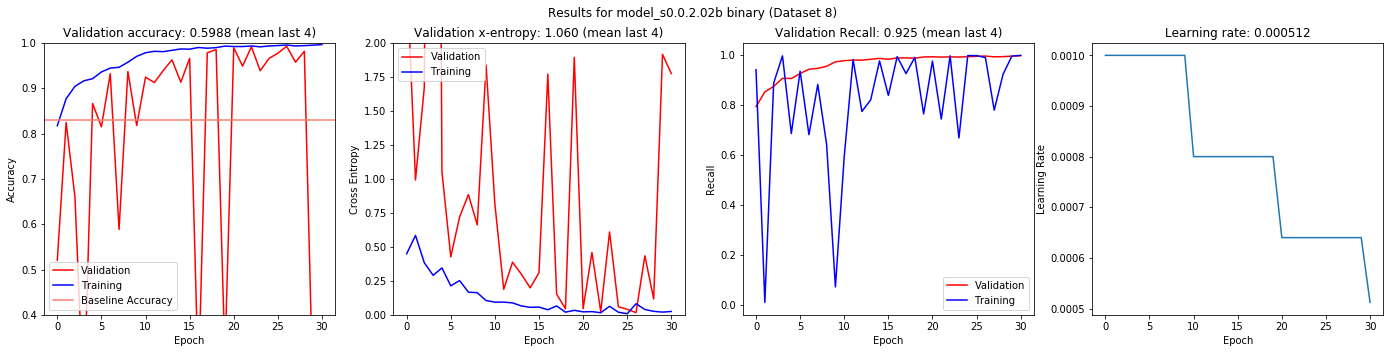

In [8]:
plot_metrics("model_s0.0.2.02b", classification="binary", dataset=8)